# Vesal Ahsani

## Predicting the Sale Price of Bulldozers using Machine Learning 

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

The techniques used in here have been inspired and adapted from [the fast.ai machine learning course](https://course18.fast.ai/ml).

## What we'll end up with

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the sale price of a bulldozer given different characteristics about it.

## 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), you can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:
1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

## 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can [download this file directly from the Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (account required) or view it on Google Sheets.

With all of this being known, let's get started! 

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

### Importing the data and preparing it for modelling

In [1]:
# Import data analysis tools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Now we've got our tools for data analysis ready, we can import the data and start to explore it.

For this project, we've [downloaded the data from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data) and stored it under the file path `"../data/"`.

In [2]:
# Import the training and validation set
df = pd.read_csv("/Users/Vesal/Desktop/Python/Python/Projects/Code-samples/Data/bluebook-for-bulldozers/TrainAndValid.csv")

/Users/Vesal/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# No parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

In [8]:
df.shape

(412698, 53)

In [9]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.saledate.head()

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [17]:
df1 = pd.read_csv("/Users/Vesal/Desktop/Python/Python/Projects/Code-samples/Data/bluebook-for-bulldozers/TrainAndValid.csv", 
                  parse_dates= ["saledate"])

/Users/Vesal/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df1.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

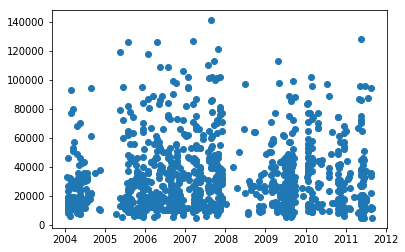

In [24]:
fig, ax = plt.subplots()
ax.plot_date(df1["saledate"][:1000], df1["SalePrice"][:1000])

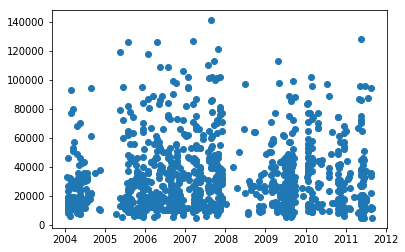

In [28]:
plt.plot_date(df["saledate"][:1000], df["SalePrice"][:1000])

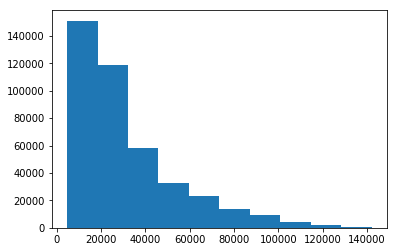

In [35]:
plt.hist(df["SalePrice"]);

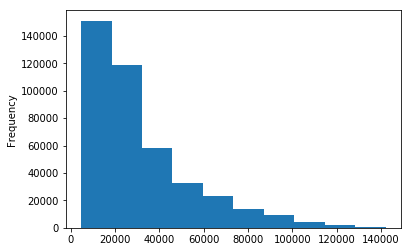

In [37]:
df["SalePrice"].plot.hist();

### Parsing dates
When working with time series data, it's a good idea to make sure any date data is the format of a [datetime object](https://docs.python.org/3/library/datetime.html) (a Python data type which encodes specific information about dates).

In [39]:
df1 = pd.read_csv("/Users/Vesal/Desktop/Python/Python/Projects/Code-samples/Data/bluebook-for-bulldozers/TrainAndValid.csv", 
                  low_memory=False,
                  parse_dates= ["saledate"])

In [40]:
# With parse_dates... check dtype of "saledate"
df1.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [42]:
df1.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [43]:
# Sort DataFrame in date order
df1.sort_values(by=["saledate"], inplace=True, ascending=True)

In [44]:
df1.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [45]:
df1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make a copy of the original DataFrame

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [47]:
# Make a copy of the original DataFrame to perform edits on
df2 = df1.copy()

In [49]:
df2.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameters for saledate column

Why?

So we can enrich our dataset with as much information as possible.

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parase_dates=["saledate"]`, we can now access the [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the `saledate` column.

In [53]:
# Add datetime parameters for saledate
df2["saleYear"] = df2["saledate"].dt.year
df2["saleMonth"] = df2["saledate"].dt.month
df2["saleDay"] = df2["saledate"].dt.day
df2["saleDayOfWeek"] = df2.saledate.dt.dayofweek
df2["saleDayOfYear"] = df2.saledate.dt.dayofyear

# Drop original saledate
df2.drop("saledate", axis=1, inplace=True)

We could add more of these style of columns, such as, whether it was the start or end of a quarter but these will do for now.

**Challenge:** See what other [datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) you can add to `df_tmp` using a similar technique to what we've used above. Hint: check the bottom of the pandas.DatetimeIndex docs.

In [55]:
df2.tail().T

,410879,412476,411927,407124,409203
SalesID,6302984,6324811,6313029,6266251,6283635
SalePrice,16000,6000,16000,55000,34000
MachineID,1915521,1919104,1918416,509560,1869284
ModelID,5266,19330,17244,3357,4701
datasource,149,149,149,149,149
auctioneerID,99,99,99,99,99
YearMade,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,D38E,2064,337G,12G,544H


In [57]:
# Check the different values of different columns
df2.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've explored our dataset a little as well as enriched it with some datetime attributes, now let's try to model.

Why model so early?

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.

Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we find a [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) might be a good candidate.

In [62]:
# This won't work since we've got missing numbers and categories
from sklearn.ensemble import RandomForestRegressor

X = df2.drop("SalePrice", axis=1)
y = df2["SalePrice"]

model = RandomForestRegressor(n_jobs=-1)
model.fit(X,y)

ValueError: could not convert string to float: 'Conventional'

In [63]:
# Check for missing categories and different datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                       412698 non-null object
ProductGroup          

In [64]:
# Check for missing values
df2.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Convert strings to categories

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the [pandas types API](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality) which allows us to interact and manipulate the types of data.

In [65]:
pd.api.types.is_string_dtype(df2["UsageBand"])

True

In [67]:
# These columns contain strings
for column, value in df2.items():
    if pd.api.types.is_string_dtype(value):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [69]:
# This will turn all of the string values into category values
for column, value in df2.items():
    if pd.api.types.is_string_dtype(value):
        df2[column] = value.astype("category").cat.as_ordered()

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null category
fiModelDesc                 412698 non-null category
fiBaseModel                 412698 non-null category
fiSecondaryDesc             271971 non-null category
fiModelSeries               58667 non-null category
fiModelDescriptor           74816 non-null category
ProductSize                 196093 non-null category
fiProductClassDesc          412698 non-null category
state                       412698 non-null category
Prod

In [73]:
df2.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [74]:
df2.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
54653        Florida
81383        Florida
204924       Florida
135376       Florida
113390       Florida
113394       Florida
116419       Florida
32138        Florida
127610       Florida
76171        Florida
127000       Florida
128130       Florida
127626       Florida
55455        Florida
55454        Florida
144032       Florida
54438        Georgia
144952       Florida
205752       Florida
28927        Georgia
86971        Florida
67034        Florida
87602        Florida
53101        Florida
205784       Florida
             ...    
407382    California
405913    California
405915    California
411423    California
412544    California
409901    California
405777    California
411889    California
409896    California
411890    California
406079    California
409783    California
411522    California
412218    California
411527    California
406092    California
409780    Cal

In [75]:
df2.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
54653      8
81383      8
204924     8
135376     8
113390     8
113394     8
116419     8
32138      8
127610     8
76171      8
127000     8
128130     8
127626     8
55455      8
55454      8
144032     8
54438      9
144952     8
205752     8
28927      9
86971      8
67034      8
87602      8
53101      8
205784     8
          ..
407382     4
405913     4
405915     4
411423     4
412544     4
409901     4
405777     4
411889     4
409896     4
411890     4
406079     4
409783     4
411522     4
412218     4
411527     4
406092     4
409780     4
406167     4
411334     4
412164     4
409202     4
408976     4
411695     4
411319     4
408889     4
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values...

In the format it's in, it's still good to be worked with, let's save it to file and reimport it so we can continue on.

### Save Processed Data

In [76]:
# Save preprocessed data
df2.to_csv("prprocessed_sample.csv", index=False)

Excellent, our processed DataFrame has the columns we added to it but it's still missing values.

In [77]:
# Check missing values
df2.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

From our experience with machine learning models. We know two things:
1. All of our data has to be numerical
2. There can't be any missing values

And as we've seen using `df_tmp.isna().sum()` our data still has plenty of missing values.

Let's fill them.

### Filling numerical values first

We're going to fill any column with missing values with the median of that column.

In [79]:
for column, value in df2.items():
    if pd.api.types.is_categorical_dtype(value):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [80]:
for column, value in df2.items():
    if pd.api.types.is_numeric_dtype(value):
        print(column)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [81]:
# Check for which numeric columns have null values
for column, value in df2.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            print(column)

auctioneerID
MachineHoursCurrentMeter


In [82]:
# Fill numeric rows with the median
for column, value in df2.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            df2[column + "_is_missing"] = pd.isnull(value)
            df2[column] = value.fillna(value.median())
            # Add a binary column which tells if the data was missing our not
            # Fill missing numeric values with median since it's more robust than the mean


Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.

In [85]:
# Check if there's any null values
for column, value in df2.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            print(column)

In [86]:
# Check to see how many examples were missing
df2.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Filling and turning categorical variables to numbers

Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [87]:
# Check columns which *aren't* numeric
for column, value in df2.items():
    if not pd.api.types.is_numeric_dtype(value):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [91]:
# Turn categorical variables into numbers
    # Check columns which *aren't* numeric
for column, value in df2.items():
    if not pd.api.types.is_numeric_dtype(value):
        df2[column + "_is_missing"] = pd.isnull(value)
        df2[column] = pd.Categorical(value).codes + 1
        # Add binary column to inidicate whether sample had missing value
        # We add the +1 because pandas encodes missing categories as -1


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 101.1 MB


In [93]:
df2.isnull().sum()

SalesID                               0
SalePrice                             0
MachineID                             0
ModelID                               0
datasource                            0
auctioneerID                          0
YearMade                              0
MachineHoursCurrentMeter              0
UsageBand                             0
fiModelDesc                           0
fiBaseModel                           0
fiSecondaryDesc                       0
fiModelSeries                         0
fiModelDescriptor                     0
ProductSize                           0
fiProductClassDesc                    0
state                                 0
ProductGroup                          0
ProductGroupDesc                      0
Drive_System                          0
Enclosure                             0
Forks                                 0
Pad_Type                              0
Ride_Control                          0
Stick                                 0


In [94]:
df2.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model!

Let's reinstantiate our trusty [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

This will take a few minutes which is too long for interacting with it. So what we'll do is create a subset of rows to work with.

In [95]:
# Instantiate model

# Fit the model
from sklearn.ensemble import RandomForestRegressor

X = df2.drop("SalePrice", axis=1)
y = df2["SalePrice"]

model = RandomForestRegressor(n_jobs=-1)
model.fit(X,y)

RandomForestRegressor(n_jobs=-1)

In [96]:
# Score the model
model.score(X,y)

0.9875557254492136

**Question:** Why is this metric not reliable?

### Splitting data into train/valid sets

In [97]:
df2.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:
* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

For more on making good training, validation and test sets, check out the post [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas.

In [98]:
df2.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [100]:
df2_valid = df2[df2.saleYear==2012]
df2_train = df2[df2.saleYear != 2012]

In [101]:
len(df2_train), len(df2_valid)

(401125, 11573)

In [102]:
# Split data into training and validation
X_train, y_train = df2_train.drop("SalePrice", axis=1), df2_train["SalePrice"]
X_valid, y_valid = df2_valid.drop("SalePrice", axis=1), df2_valid["SalePrice"]

In [105]:
# Split data into X & y
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, [the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

**RMSLE** = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. **MAE** (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's [mean_squared_log_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error) (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.

In [108]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    y_train_preds = model.predict(X_train)
    y_valid_preds = model.predict(X_valid)
    scores = {"training RMSLE": rmsle(y_train, y_train_preds),
              "valid RMSLE": rmsle(y_valid, y_valid_preds),
              "training R2" : r2_score(y_train, y_train_preds),
              "valid R2" : r2_score(y_valid, y_valid_preds)}
    return scores


### Testing our model on a subset (to tune the hyperparameters)

Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

If you're experiments are taking longer than 10-seconds (give or take how long you have to wait), you should be trying to speed things up. You can speed things up by sampling less data or using a faster computer.

In [50]:
# This takes too long...

# %%time
# # Retrain a model on training data
# model.fit(X_train, y_train)
# show_scores(model)

401125

Depending on your computer (mine is a MacBook Pro), making calculations on ~400,000 rows may take a while...

Let's alter the number of samples each `n_estimator` in the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) see's using the `max_samples` parameter.

In [109]:
# Change max samples in RandomForestRegressor
model_abstract = RandomForestRegressor(n_jobs=-1, max_samples=10000)

Setting `max_samples` to 10000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from).

In [116]:
# Cutting down the max number of samples each tree can see improves training time
%time
model_abstract.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [117]:
show_scores(model_abstract)

{'training R2': 0.8601880683515133,
 'training RMSLE': 0.2580817061929694,
 'valid R2': 0.8332594696793717,
 'valid RMSLE': 0.294082563627193}

Beautiful, that took far less time than the model with all the data.

With this, let's try tune some hyperparameters.

### Hyperparameter tuning with RandomizedSearchCV

You can increase `n_iter` to try more combinations of hyperparameters but in our case, we'll try 20 and see where it gets us.

Remember, we're trying to reduce the amount of time it takes between experiments.

In [ ]:
m = RandomForestRegressor()

In [121]:
%%time

from sklearn.model_selection import RandomizedSearchCV
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model_abstract = RandomizedSearchCV(RandomForestRegressor(), 
                                      param_distributions = rf_grid,
                                      n_iter=20,
                                      cv=5,
                                      verbose=True)

rs_model_abstract.fit(X_train, y_train)           

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 8min 13s, sys: 41 s, total: 8min 54s
Wall time: 9min 9s


In [122]:
# Find the best parameters from the RandomizedSearch 
rs_model_abstract.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 60}

In [123]:
# Evaluate the RandomizedSearch model
show_scores(rs_model_abstract)

{'training R2': 0.8466011172954204,
 'training RMSLE': 0.2665162056202794,
 'valid R2': 0.8179663591417574,
 'valid RMSLE': 0.29872580116846226}

### Train a model with the best parameters

In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting `n_iter` to 100 in `RandomizedSearchCV`) and found the best results came from the ones you see below.

**Note:** This kind of search on my computer (`n_iter` = 100) took ~2-hours. So it's kind of a set and come back later experiment.

We'll instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value.

In [124]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 9min 46s, sys: 4.7 s, total: 9min 51s
Wall time: 2min 47s


In [125]:
show_scores(ideal_model)

{'training R2': 0.9596647253618048,
 'training RMSLE': 0.14343574640529083,
 'valid R2': 0.8837776200830605,
 'valid RMSLE': 0.244378516087285}

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

You can make a faster model by altering some of the hyperparameters. Particularly by lowering `n_estimators` since each increase in `n_estimators` is basically building another small model.

However, lowering of `n_estimators` or altering of other hyperparameters may lead to poorer results.

In [126]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 4min 19s, sys: 3.45 s, total: 4min 22s
Wall time: 1min 25s


In [127]:
show_scores(fast_model)

{'training R2': 0.9672530750203389,
 'training RMSLE': 0.1292325074001898,
 'valid R2': 0.8819140197219556,
 'valid RMSLE': 0.24408992861277026}

### Make predictions on test data

Now we've got a trained model, it's time to make predictions on the test data.

Remember what we've done.

Our model is trained on data prior to 2011. However, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [152]:
df_test = pd.read_csv("/Users/Vesal/Desktop/Python/Python/Projects/Code-samples/Data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])



In [153]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [154]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [155]:
# Let's see how the model goes predicting on the test data
fast_model.predict(df_test)

ValueError: could not convert string to float: 'Conventional'

Ahhh... the test data isn't in the same format of our other data, so we have to fix it. Let's create a function to preprocess our data.

### Preprocessing the data

Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember: Whatever you do to the training data, you have to do to the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above).

In [156]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
SalesID                     12457 non-null int64
MachineID                   12457 non-null int64
ModelID                     12457 non-null int64
datasource                  12457 non-null int64
auctioneerID                12457 non-null int64
YearMade                    12457 non-null int64
MachineHoursCurrentMeter    2129 non-null float64
UsageBand                   1834 non-null object
saledate                    12457 non-null datetime64[ns]
fiModelDesc                 12457 non-null object
fiBaseModel                 12457 non-null object
fiSecondaryDesc             8482 non-null object
fiModelSeries               2006 non-null object
fiModelDescriptor           3024 non-null object
ProductSize                 6048 non-null object
fiProductClassDesc          12457 non-null object
state                       12457 non-null object
ProductGroup                12457 non-null o

In [157]:
df_test.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [158]:
def data_preprocessing(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, array in df.items():
        if pd.api.types.is_numeric_dtype(array):
            if pd.isnull(array).sum():
                df[label + "_is_missing"] = pd.isnull(array)
                df[label] = array.fillna(array.median())
    # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(array):
            df[label+ "_is_missing"] = pd.isnull(array)
    # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(array).codes + 1
        
    return df

**Question:** Where would this function break?

**Hint:** What if the test data had different missing values to the training data?

Now we've got a function for preprocessing data, let's preprocess the test dataset into the same format as our training dataset.

In [159]:
df_test = data_preprocessing(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [161]:
df_test.tail().T

,12452,12453,12454,12455,12456
SalesID,6643171,6643173,6643184,6643186,6643196
MachineID,2558317,2558332,2558342,2558343,2558346
ModelID,21450,21434,21437,21437,21446
datasource,149,149,149,149,149
auctioneerID,2,2,2,2,2
YearMade,2008,2005,1000,2006,2008
MachineHoursCurrentMeter,3525,3525,3525,3525,3525
UsageBand,0,0,0,0,0
fiModelDesc,713,186,325,325,483
fiBaseModel,235,80,123,123,171


In [162]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


We've found an error and it's because our test dataset (after preprocessing) has 101 columns where as, our training dataset (`X_train`) has 102 columns (after preprocessing).

Let's find the difference.

In [164]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In this case, it's because the test dataset wasn't missing any `auctioneerID` fields.

To fix it, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with `False`, since none of the `auctioneerID` fields are missing in the test dataset.

In [165]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False

In [166]:
df_test.shape

(12457, 102)

Now the test dataset matches the training dataset, we should be able to make predictions on it using our trained model. 

In [168]:
# Make predictions on the test dataset using the best model
y_preds = ideal_model.predict(df_test)

When looking at the [Kaggle submission requirements](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation), we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

Let's make it.

In [169]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = y_preds

In [170]:
df_preds.head()

,SalesID,SalePrice
0,1227829,21709.898457
1,1227844,20454.561599
2,1227847,50346.032993
3,1227848,65982.859109
4,1227863,44942.542163


In [74]:
# Export to csv...
#df_preds.to_csv("../data/bluebook-for-bulldozers/predictions.csv",
#                index=False)

## Feature Importance

Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where **feature importance** comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for random forests can lead to non-ideal results.

To find which features were most important of a machine learning model, a good idea is to search something like "\[MODEL NAME\] feature importance".

Doing this for our `RandomForestRegressor` leads us to find the `feature_importances_` attribute.

Let's check it out.

In [171]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.27274811e-02, 1.74076378e-02, 4.52997719e-02, 1.94181768e-03,
       3.35369961e-03, 1.96531591e-01, 3.19232388e-03, 1.05489053e-03,
       4.74992534e-02, 4.07321622e-02, 6.62443904e-02, 4.71082936e-03,
       2.07290111e-02, 1.33617669e-01, 4.43473996e-02, 5.97389447e-03,
       2.40576037e-03, 3.55645144e-03, 3.98969078e-03, 8.09676607e-02,
       4.99166996e-04, 8.50141069e-05, 1.30900884e-03, 3.04930208e-04,
       1.03504038e-03, 2.51246796e-05, 1.25436856e-03, 5.88466668e-03,
       1.33290483e-03, 3.04508949e-03, 2.66219487e-03, 1.73294076e-03,
       4.86005245e-03, 1.09886750e-03, 1.47515434e-03, 8.65030223e-03,
       1.01234477e-03, 1.16948966e-02, 1.41777355e-03, 1.86205062e-03,
       1.16477187e-03, 1.05179069e-03, 3.27976462e-03, 6.11524852e-04,
       3.69038865e-04, 3.51116312e-04, 2.42021786e-04, 2.80617174e-03,
       9.19962893e-04, 2.52380920e-04, 4.37643543e-04, 7.27059646e-02,
       3.81032588e-03, 5.72193260e-03, 2.93242870e-03, 9.86208306e-03,
      

In [181]:
features_df = pd.DataFrame({"features" : ideal_model.feature_importances_, 
                            "columns" : df_test.columns})

In [187]:
final_features = features_df.sort_values("features", ascending=False)

In [199]:
final_features[:20]

,columns,features
5,YearMade,0.196532
13,ProductSize,0.133618
19,Enclosure,0.080968
51,saleYear,0.072706
10,fiSecondaryDesc,0.066244
8,fiModelDesc,0.047499
2,ModelID,0.045300
14,fiProductClassDesc,0.044347
9,fiBaseModel,0.040732
64,fiProductClassDesc_is_missing,0.035745


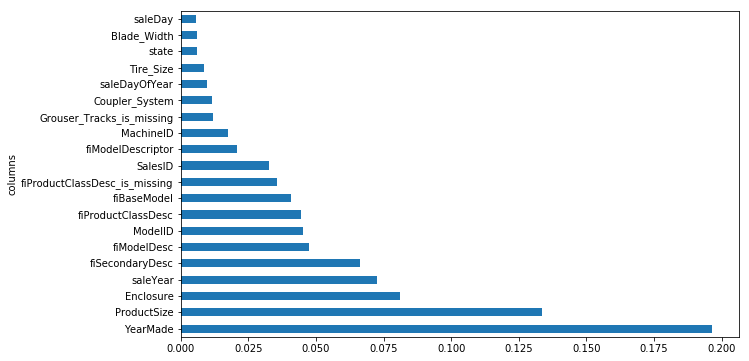

In [205]:
final_features[:20].plot.barh(x= "columns", figsize = (10,6), legend=False);

In [79]:
# Install Seaborn package in current environment (if you don't have it)
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

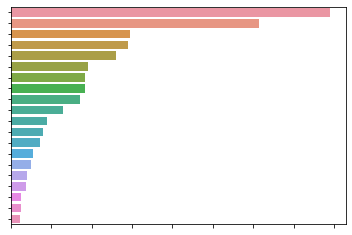

In [209]:
df1.YearMade.value_counts()

1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
1997    19269
2000    17238
1996    17001
1995    15806
2003    14661
1994    14471
2006    13426
2001    13385
2002    12473
1993    11181
1989    10785
1988    10546
1990    10379
1987    10191
1992     7711
1986     7588
1991     7461
1985     6547
1984     6174
1978     5693
1979     5613
2007     5048
1980     4744
1983     4603
1977     4425
        ...  
1966      951
1965      675
1964      418
1963      250
2009      212
1962      145
1919      127
1961       99
1960       97
2010       58
2011       31
1959       28
1958       25
1956       20
1920       17
1957       16
1950        8
1953        7
1951        7
1952        6
1955        5
1954        3
1948        3
2014        2
1949        1
1947        1
1942        1
1937        1
2012        1
2013        1
Name: YearMade, Length: 73, dtype: int64

In [208]:
df1.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64